# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Statement

**Housing Price Prediction**

We have a simple data set with only two data points - a house with 1000 square feet(sqft) sold for 300,000 dollars and a house with 2000 square feet sold for 500,000 dollars. These two points will constitute our *data or training set*. The units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------- | ------------------------ |
| 1.0                  | 300                      |
| 2.0                  | 500                      |

We would like to fit a linear regression model through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


## Model Function

The model function for linear regression (which is a function that maps from $x$ to $y$) is represented as
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [3]:
def compute_model_output(x, w, b):
    """
    Computes the predection of a linear model

    Args:
        x (ndarray (m,)): Data, m examples
        w,b (scalar)    : model parameters
    Returns
        y (ndarray (m,)): target values
    """
    return np.array([w * x_i + b for x_i in x])

## Cost Function

Cost is a measure how well our model is predicting the target price of the house.

The equation for cost with one variable is:
$$J(w,b) = \frac{1}{2m} \sum_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

where
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the actual value and the prediction.
- These differences are summed over all the $m$ examples and divided by $2m$ to produce the cost, $J(w,b)$.

In [4]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression

    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters
    Returns:
        total_cost (float): The cost of using w, b as the parameters for linear regression
    """
    m = x.shape[0]
    f_wb = compute_model_output(x, w, b)
    return (1 / (2 * m)) * sum([(f_wb_i - y_i) ** 2 for f_wb_i, y_i in zip(f_wb, y)])

## Gradient

Gradient is the slope of cost function. It is the change in cost with respect to some change in $(w, b)$.

$$\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i = 0}^{m - 1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)x^{(i)}$$
$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i = 0}^{m - 1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)$$

In [5]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters
    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """
    m = x.shape[0]
    f_wb = compute_model_output(x, w, b)
    dj_dw = (1 / m) * sum([(f_wb_i - y_i) * x_i for f_wb_i, x_i, y_i in zip(f_wb, x, y)])
    dj_db = (1 / m) * sum([(f_wb_i - y_i) for f_wb_i, y_i in zip(f_wb, y)])
    return dj_dw, dj_db

## Gradient Descent

The values of $(w, b)$ are updated as:

$$w = w - \alpha \frac{\partial J(w,b)}{\partial w}$$
$$b = b - \alpha \frac{\partial J(w,b)}{\partial b}$$

- $\alpha$ is the learning rate.
- Parameters $w$, $b$ are updated simultaneously.

In [6]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Performs gradient descent to fit w, b to the dataset
    Updates w, b by taking num_iters gradient steps with learning rate alpha

    Args:
        x (ndarray (m,))       : Data, m examples
        y (ndarray (m,))       : target values
        w_init, b_init (scalar): initial values of model parameters
        alpha (float)          : Learning rate
        num_iters (int)        : number of iterations to run gradient descent
    Returns:
        w, b (scalar)              : Updated values of parameters after running gradient descent
        w_history, b_history (List): History of parameters (w, b)
        cost_history (List)        : History of cost values
    """
    w, b = w_init, b_init
    cost_history, w_history, b_history = [], [], []
    for i in range(num_iters):
        cost_history.append(compute_cost(x, y, w, b))
        w_history.append(w); b_history.append(b)
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: \tCost: {cost_history[-1]: 0.2e} \tdj/dw: {dj_dw: 0.3e} \tdj/db: {dj_db: 0.3e} \tw: {w: 0.3e} \tb: {b: 0.5e}")
    return w, b, np.array(w_history), np.array(b_history), np.array(cost_history)

In [7]:
w_init, b_init = 0, 0
num_iters = int(1e4)
alpha = 0.01
w_final, b_final, w_history, b_history, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters)

Iteration    0: 	Cost:  8.50e+04 	dj/dw: -6.500e+02 	dj/db: -4.000e+02 	w:  6.500e+00 	b:  4.00000e+00
Iteration 1000: 	Cost:  3.42e+00 	dj/dw: -3.712e-01 	dj/db:  6.007e-01 	w:  1.949e+02 	b:  1.08228e+02
Iteration 2000: 	Cost:  7.94e-01 	dj/dw: -1.789e-01 	dj/db:  2.895e-01 	w:  1.975e+02 	b:  1.03966e+02
Iteration 3000: 	Cost:  1.84e-01 	dj/dw: -8.625e-02 	dj/db:  1.396e-01 	w:  1.988e+02 	b:  1.01912e+02
Iteration 4000: 	Cost:  4.29e-02 	dj/dw: -4.158e-02 	dj/db:  6.727e-02 	w:  1.994e+02 	b:  1.00922e+02
Iteration 5000: 	Cost:  9.96e-03 	dj/dw: -2.004e-02 	dj/db:  3.243e-02 	w:  1.997e+02 	b:  1.00444e+02
Iteration 6000: 	Cost:  2.31e-03 	dj/dw: -9.660e-03 	dj/db:  1.563e-02 	w:  1.999e+02 	b:  1.00214e+02
Iteration 7000: 	Cost:  5.38e-04 	dj/dw: -4.657e-03 	dj/db:  7.535e-03 	w:  1.999e+02 	b:  1.00103e+02
Iteration 8000: 	Cost:  1.25e-04 	dj/dw: -2.245e-03 	dj/db:  3.632e-03 	w:  2.000e+02 	b:  1.00050e+02
Iteration 9000: 	Cost:  2.90e-05 	dj/dw: -1.082e-03 	dj/db:  1.751e-03 	w

In [8]:
cost_final = compute_cost(x_train, y_train, w_final, b_final)
print(f'w    : {w_final:.2f}')
print(f'b    : {b_final:.2f}')
print(f'Cost : {cost_final:.2f}')

w    : 199.99
b    : 100.01
Cost : 0.00


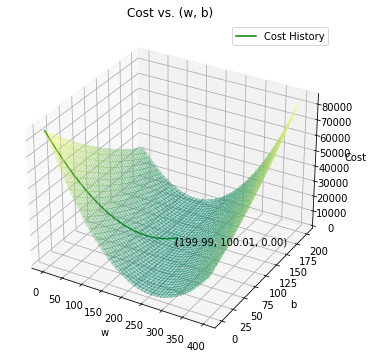

In [9]:
ax = plt.figure(figsize=(10, 6)).add_subplot(projection='3d')

w_range, b_range = np.meshgrid(np.arange(0, 2 * w_final), np.arange(0, 2 * b_final))
cost_range = np.array([compute_cost(x_train, y_train, w_i, b_i) for w_i, b_i in zip(w_range, b_range)])

ax.plot_surface(w_range, b_range, cost_range, alpha=0.3, cmap='summer', antialiased=False)
ax.plot(w_history, b_history, cost_history, label='Cost History', color='green')
ax.text(w_final, b_final, cost_final, f'({w_final:.2f}, {b_final:.2f}, {cost_final:.2f})')

ax.set(xlabel='w', ylabel='b', zlabel='Cost')
plt.title('Cost vs. (w, b)')
plt.legend()
plt.show()